# Homework 8

## Problem 1: Air Temperature Observations in Complex Terrain (60%)

Download the file “iButtons_2008-2010.mat” from the Files/Week 08 folder on the course website. It contains hourly air temperature [°C] observations from 21 distributed sensors (iButtons) located around the watershed of the North Fork of the American River in the Sierra Nevada of California, over a period from September 2007 to July 2010. It also contains information about the sites’ names, numbers, coordinates and elevations. See Fig. 1 for a map of the sites.

![Fig1](figure1.png)

Figure 1: iButton locations and topographic shading. The sites are located around the American River canyon on the west slope of the Sierra Nevada Mountains in California. Lake Tahoe is the large flat area in the southeast portion of the map.

Data:	 iButtons_2008-2010.mat

## A.

Plot the temperature observations (AIR _TEMPERATURE) at all sites on one plot over time; use the title, xlabel, ylabel and datetick commands to label your plot and its axes. Use the zoom feature to examine the data at finer scales.
Qualitatively describe the dataset, including its minimum and maximum values, its major variability in time, and how correlated the stations appear to be with one another.

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio 
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt

from numpy.linalg import svd

%matplotlib inline

**Read in Files**

In [2]:
data = sio.loadmat('iButtons_2008-2010.mat')

In [3]:
# Inspect the dictionary keys
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'SITE_NUMBERS', 'SITE_NAMES', 'SITE_LATS', 'SITE_LONS', 'SITE_ELEVS', 'TIME', 'AIR_TEMPERATURE', 'nx', 'nt', 'AIR_TEMPERATURE_ZEROMEAN'])


In [16]:
# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=int(d)%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
S_numbers = data['SITE_NUMBERS']
S_names = data['SITE_NAMES']
S_lats = data['SITE_LATS'] #latitude
S_lons = data['SITE_LONS'] #longitude
S_elevs=data['SITE_ELEVS']
temp = data['AIR_TEMPERATURE'] # latitude on a grid
temp_zmean = data['AIR_TEMPERATURE_ZEROMEAN']
nx = data['nx'][0][0] # size in the x dimension
nt = data['nt'][0][0]


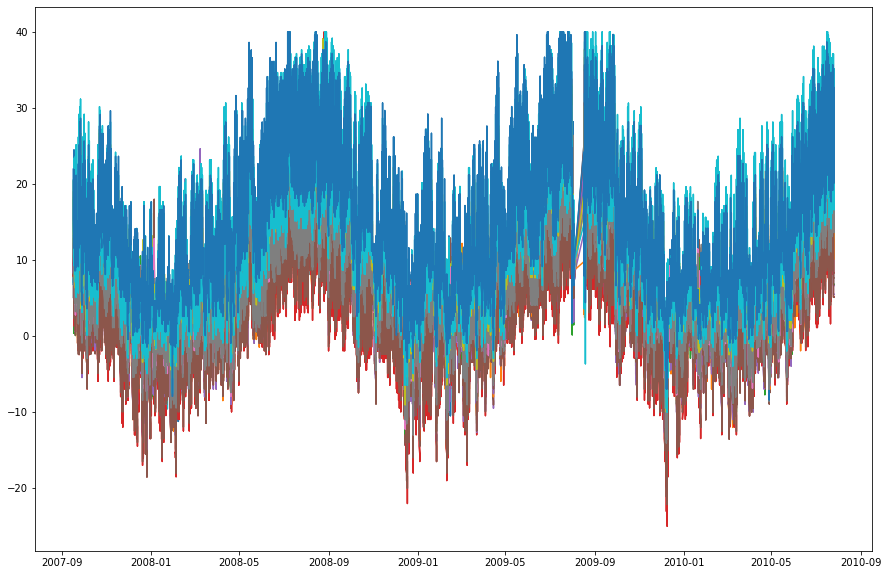

In [37]:
plt.figure(figsize=(15,10))
#temp[:,1]
plt.plot(dates,temp);

## B.

Use the command: **[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN,False)** to calculate the PCs, variances, and EOFs, respectively, of a version of the dataset where the mean temperature at each station has been subtracted out.

Describe how the variance is distributed among the patterns; how much is described by the leading pattern? By the second pattern?

## C.

Plot the leading pattern’s spatial weights (EOF) against latitude and longitude.

Describe the first pattern’s spatial weights’ sign and variability.

## D.

Plot the leading pattern’s temporal weights (PCs). When are they positive and when are they negative?

Consider the PCs’ sign and magnitude, and consider the sign of the EOF in Part C. When does this pattern generate warmer-than-normal temperatures? Colder-thannormal temperatures? Are the anomalies associated with this pattern of the same sign at all sites?

## E.

Repeat C) and D) for the 2nd-leading pattern.

Interpret physically what the first two patterns may represent. How much of the dataset is described by the first two modes of variability?

# Problem 2: Timeseries Analysis (35%)

Download the file “waterlevel.mat” (provided below, or from the Files/Data folder of the course website). It contains hourly measurements of water level (Level, in cm) from an unidentified site for one year. The sampling frequency, sf, is 24, and the timeseries, t, is in days. Plot the data and zoom in to see what’s going on. Use the timeseries analysis techniques we discussed in lab to plot the spectral density of this data. Do this both for the entire timeseries and for four equal-sized chunks of the data. From these plots, identify whether the noise associated is with this data series is red noise or white noise, and identify at what frequencies the timeseries varies. Based on what you find, where do you think this water level measurement was taken?

Data:	
waterlevel.mat

# Problem 3: Most Useful Parts of the Course (5%)

You can highlight all of the parts of the course that you did not like in the evaluations where you are completely anonymous. Here, tell me which parts (subjects/topics) of the course you found the most useful and why. What aspects of lab or lecture most helped you learn these subjects, and how could they be made even better. [To give you perspective, each year I cut some things and add others – I want to know which things were too good to cut, and I appreciate the feedback.]